In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_excel("C:/Users/USER/Downloads/Car_sales.XLSX")

In [5]:
#Identify the variable types in the given data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

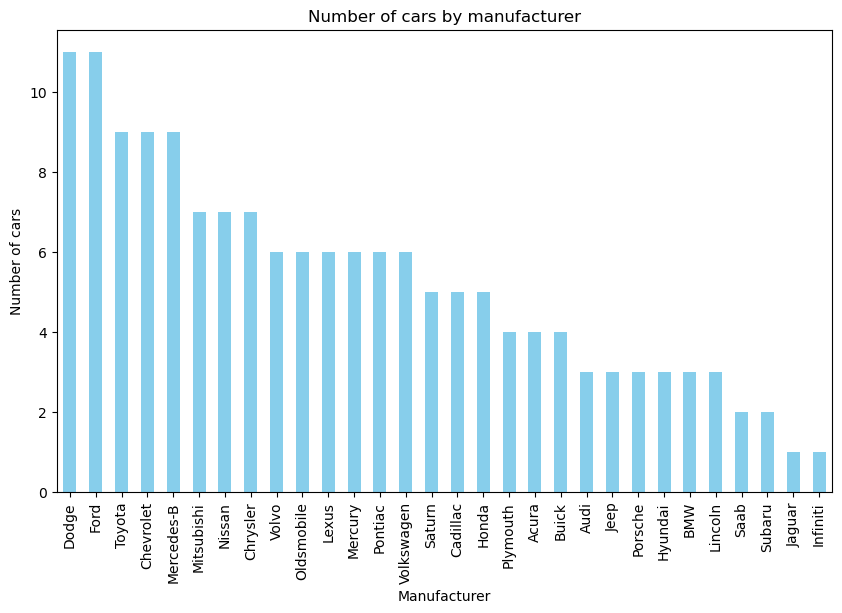

In [21]:
#Make a bar graph for manufacturer type
manufacturer_count=df['Manufacturer'].value_counts()
manufacturer_count
plt.figure(figsize=(10,6))
manufacturer_count.plot(kind='bar', color ='skyblue')
plt.title("Number of cars by manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of cars")
plt.show()


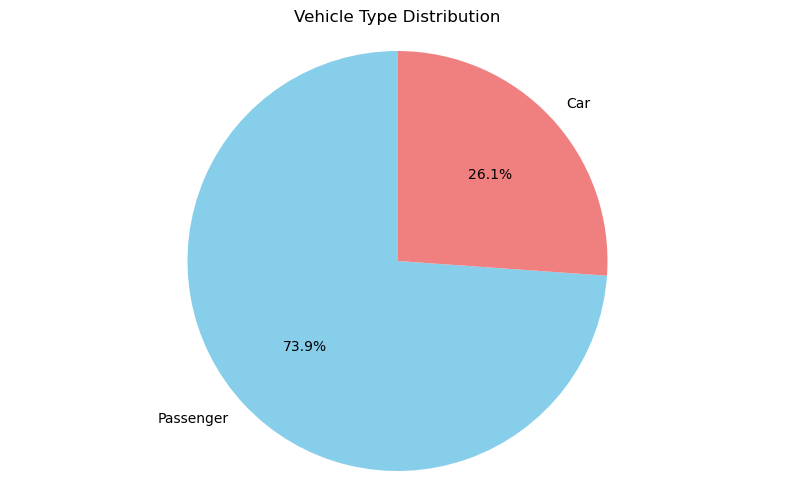

In [27]:
#Make a pie chart for showing vehicle type by percentage

vehicle_count=df['Vehicle_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(vehicle_count,labels=vehicle_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Vehicle Type Distribution")
plt.axis("equal")
plt.show()

In [28]:
#Calculate average Price of all cars by using correct measure of central Tendency
average_price = df['Price_in_thousands'].mean()
average_price 

27.390754838709682

In [32]:
#Calculate the variance and standard deviation for numerical columns such as
#Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']
standard_deviation=df[numerical_columns].std()
variance=df[numerical_columns].var()
print('Standard deviation :')
print(standard_deviation)
print('\n Variance :')
print(variance)

Standard deviation :
Sales_in_thousands     68.029422
__year_resale_value    11.453384
Price_in_thousands     14.351653
Engine_size             1.044653
Horsepower             56.700321
dtype: float64

 Variance :
Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
dtype: float64


In [42]:
#For the same columns Calculate IQR and identify outliers in these columns
#Q1 = df[column].quantile(0.25)
#Q3 = df[column].quantile(0.75)
#IQR = Q3 - Q1
#outliers = df[(df[column] &lt; Q1 - 1.5 * IQR) | (df[column] &gt; Q3 + 1.5 * IQR)]

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']
for column in numerical_columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    
    OUTLIERS=df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"column: {column}")
    print(f"IQR: {IQR}")
    print(f"Outliers:{OUTLIERS} ")

column: Sales_in_thousands
IQR: 53.842
Outliers:    Manufacturer           Model  Sales_in_thousands  __year_resale_value  \
40         Dodge      Ram Pickup             227.061               15.060   
45         Dodge         Caravan             181.749               12.025   
49          Ford          Taurus             245.815               10.055   
50          Ford           Focus             175.670                  NaN   
52          Ford        Explorer             276.747               16.640   
53          Ford        Windstar             155.787               13.175   
55          Ford          Ranger             220.650                7.850   
56          Ford        F-Series             540.561               15.075   
57         Honda           Civic             199.685                9.850   
58         Honda          Accord             230.902               13.210   
69          Jeep  Grand Cherokee             157.040               18.810   
137       Toyota           C

<font size="4">Make Histograms for all Numerical columns and identify the distribution of type by calculating
skewness;
Note : If the skewness is 0, it indicates a perfectly symmetrical distribution.
If the skewness is negative, it means the distribution is skewed to the left (long left tail).
If the skewness is positive, it means the distribution is skewed to the right (long right tail).

Skewness for Sales_in_thousands : 3.408518366470572

Skewness for __year_resale_value : 2.2949154931263167

Skewness for Price_in_thousands : 1.765734331031903

Skewness for Engine_size : 1.1004473434089452

Skewness for Horsepower : 1.000694991792015



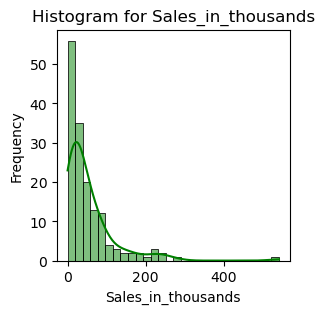

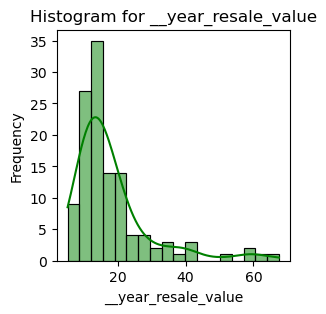

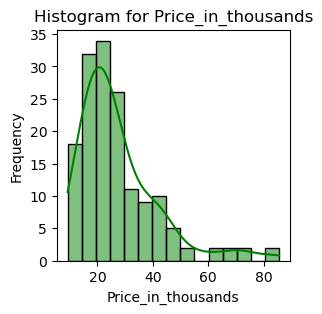

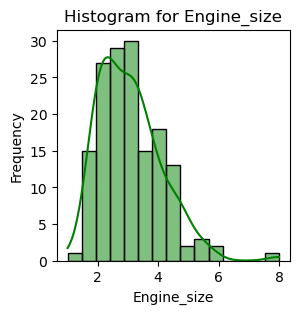

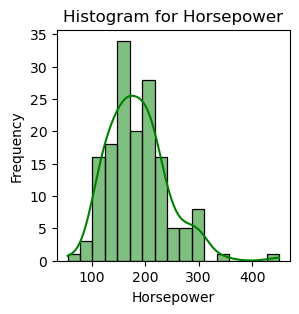

In [44]:
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']
for column in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.histplot(df[column], kde=True, color='Green')
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show
    
    skewness = df[column].skew()
    print(f'Skewness for {column} : {skewness}\n')